In [1]:
import shapely
import rasterio
#from rasterio.plot import show
import shapely.geometry as geom


import rasterio as rio
from rasterio.mask import mask
 
import rioxarray

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
#import plotly

In [1]:
import matplotlib
#%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.plot([1,2,3])

In [ ]:
plt.plot([1, 2, 3])
plt.show()

In [2]:
poly_building = [[156756.23355191946, 239387.70288807154],
 [156761.3869599253, 239376.37066406384],
 [156767.87143993378, 239379.28983206674],
 [156768.62420792878, 239377.63709606603],
 [156770.79508793354, 239376.7989520654],
 [156773.09806393832, 239377.96093606576],
 [156773.7593119368, 239379.8987280652],
 [156772.9146399349, 239381.6417040676],
 [156783.99508794397, 239386.78576807305],
 [156778.73275193572, 239398.19453607872],
 [156771.1684639305, 239394.66288807616],
 [156771.95361593366, 239393.34615207464],
 [156764.3418399319, 239389.92445607483],
 [156763.67150393128, 239391.2441360727],
 [156756.23355191946, 239387.70288807154]]
poly_building = [[154903.46516664326, 238441.10026341677],
     [154900.6807826385, 238447.15248742327],
     [154894.67809463292, 238444.41315941885],
     [154896.5193746388, 238440.5250314176],
     [154891.68059063703, 238438.12477541715],
     [154890.47316662967, 238440.83760741726],
     [154883.6819986254, 238437.6483594142],
     [154888.88417463005, 238426.53219940886],
     [154899.87745463848, 238431.69239141047],
     [154901.75675064325, 238427.712615408],
     [154907.2643346414, 238430.41623140872],
     [154904.82683064044, 238435.2454154119],
     [154906.65595064312, 238436.14640741423],
     [154904.11771064252, 238441.41667941958],
     [154903.46516664326, 238441.10026341677]]

poly_building







[[154903.46516664326, 238441.10026341677],
 [154900.6807826385, 238447.15248742327],
 [154894.67809463292, 238444.41315941885],
 [154896.5193746388, 238440.5250314176],
 [154891.68059063703, 238438.12477541715],
 [154890.47316662967, 238440.83760741726],
 [154883.6819986254, 238437.6483594142],
 [154888.88417463005, 238426.53219940886],
 [154899.87745463848, 238431.69239141047],
 [154901.75675064325, 238427.712615408],
 [154907.2643346414, 238430.41623140872],
 [154904.82683064044, 238435.2454154119],
 [154906.65595064312, 238436.14640741423],
 [154904.11771064252, 238441.41667941958],
 [154903.46516664326, 238441.10026341677]]

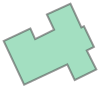

In [3]:
polygon = geom.Polygon(poly_building)

polygon

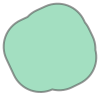

In [4]:
polygon.buffer(20)

In [5]:
file_path = 'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\GeoTIFF\\DHMVIIDSMRAS1m_k01.tif'

In [6]:
img = rasterio.open(file_path)
#show(img)

In [7]:
help(rasterio.open)

Help on function open in module rasterio:

open(fp, mode='r', driver=None, width=None, height=None, count=None, crs=None, transform=None, dtype=None, nodata=None, sharing=False, **kwargs)
    Open a dataset for reading or writing.
    
    The dataset may be located in a local file, in a resource located by
    a URL, or contained within a stream of bytes.
    
    In read ('r') or read/write ('r+') mode, no keyword arguments are
    required: these attributes are supplied by the opened dataset.
    
    In write ('w' or 'w+') mode, the driver, width, height, count, and dtype
    keywords are strictly required.
    
    Parameters
    ----------
    fp : str, file object or pathlib.Path object
        A filename or URL, a file object opened in binary ('rb') mode,
        or a Path object.
    mode : str, optional
        'r' (read, the default), 'r+' (read/write), 'w' (write), or
        'w+' (write/read).
    driver : str, optional
        A short format driver name (e.g. "GTiff" or "

In [8]:
help(mask)

Help on function mask in module rasterio.mask:

mask(dataset, shapes, all_touched=False, invert=False, nodata=None, filled=True, crop=False, pad=False, pad_width=0.5, indexes=None)
    Creates a masked or filled array using input shapes.
    Pixels are masked or set to nodata outside the input shapes, unless
    `invert` is `True`.
    
    If shapes do not overlap the raster and crop=True, a ValueError is
    raised.  Otherwise, a warning is raised.
    
    Parameters
    ----------
    dataset : a dataset object opened in 'r' mode
        Raster to which the mask will be applied.
    shapes : iterable object
        The values must be a GeoJSON-like dict or an object that implements
        the Python geo interface protocol (such as a Shapely Polygon).
    all_touched : bool (opt)
        Include a pixel in the mask if it touches any of the shapes.
        If False (default), include a pixel only if its center is within one of
        the shapes, or if it is selected by Bresenham's 

In [9]:
src = rasterio.open(file_path)

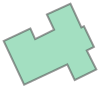

In [10]:
polygon

In [11]:
nBuffer = 2

raster_file = file_path

print(polygon)

print("Attempting to crop")
try:
    with rasterio.open(raster_file) as src:
        out_image, out_transform = mask(src, [polygon.buffer(nBuffer)], all_touched=True, crop=True, nodata = -10, pad=True)
    print("Cropped image successfully")
except Exception as e:
    print("Cropping failed")
    print(repr(e))
    


POLYGON ((154903.4651666433 238441.1002634168, 154900.6807826385 238447.1524874233, 154894.6780946329 238444.4131594189, 154896.5193746388 238440.5250314176, 154891.680590637 238438.1247754171, 154890.4731666297 238440.8376074173, 154883.6819986254 238437.6483594142, 154888.88417463 238426.5321994089, 154899.8774546385 238431.6923914105, 154901.7567506433 238427.712615408, 154907.2643346414 238430.4162314087, 154904.8268306404 238435.2454154119, 154906.6559506431 238436.1464074142, 154904.1177106425 238441.4166794196, 154903.4651666433 238441.1002634168))
Attempting to crop
Cropped image successfully


In [12]:
out_image[0].shape

(26, 29)

In [ ]:
plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

In [ ]:
# Plot a subset of the layer as a 3D image
layer_slice = out_image[0]

nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(13,13))
ha = hf.add_subplot(111, projection='3d')

#ha.plot_surface(X, Y, layer_slice)
#ha.set_zlim(0, 20)
#plt.xlabel('x')
#plt.ylabel('y')
#ha.invert_xaxis()
#ha.invert_yaxis()
##plt.show()


In [ ]:
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()


In [ ]:
help(go.Figure)

In [ ]:
help(go)

In [ ]:
# Read data from a csv

plotly.offline.init_notebook_mode(connected=True)

z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

# fig = go.Figure(data=[go.Surface(z=layer_slice)])
fig = go.Figure(data=[go.Surface(z=z_data)])

fig.layout.update()

#fig.update_layout(title='Random 3D Terrain')

#fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                  width=500, height=500,
#                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
type(z_data)

In [ ]:
fig

In [ ]:
layer_slice

In [21]:
help(plt.figure())


Help on Figure in module matplotlib.figure object:

class Figure(FigureBase)
 |  Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None)
 |  
 |  The top level container for all the plot elements.
 |  
 |  The Figure instance supports callbacks through a *callbacks* attribute
 |  which is a `.CallbackRegistry` instance.  The events you can connect to
 |  are 'dpi_changed', and the callback will be called with ``func(fig)`` where
 |  fig is the `Figure` instance.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure background patch.
 |  
 |  suppressComposite
 |      For multiple figure images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |      FigureBa

<Figure size 432x288 with 0 Axes>

In [22]:
# Do the same for online image
raster_file = "zip+https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k01.zip!/GeoTIFF/DHMVIIDSMRAS1m_k01.tif"

polygon = geom.Polygon(poly_building)
print(polygon)

print("Attempting to crop")
try:
    with rasterio.open(raster_file) as src:
        out_image, out_transform = mask(src, [polygon], all_touched=True, crop=True, nodata = -10, pad=True)
    print("Cropped image successfully")
except Exception as e:
    print("Cropping failed")
    print(repr(e))
    
# Plot a subset of the layer as a 3D image
layer_slice = out_image[0]

nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(5,5))
#ha = hf.add_subplot(111, projection='3d')

#ha.plot_surface(X, Y, layer_slice)
#ha.set_zlim(0, 50)
#plt.xlabel('x')
#plt.ylabel('y')
#ha.invert_xaxis()
#ha.invert_yaxis()
plt.show()

POLYGON ((154903.4651666433 238441.1002634168, 154900.6807826385 238447.1524874233, 154894.6780946329 238444.4131594189, 154896.5193746388 238440.5250314176, 154891.680590637 238438.1247754171, 154890.4731666297 238440.8376074173, 154883.6819986254 238437.6483594142, 154888.88417463 238426.5321994089, 154899.8774546385 238431.6923914105, 154901.7567506433 238427.712615408, 154907.2643346414 238430.4162314087, 154904.8268306404 238435.2454154119, 154906.6559506431 238436.1464074142, 154904.1177106425 238441.4166794196, 154903.4651666433 238441.1002634168))
Attempting to crop
Cropped image successfully


<Figure size 360x360 with 0 Axes>

In [30]:
hf.__dict__

{'_stale': True,
 'stale_callback': None,
 'figure': <Figure size 360x360 with 0 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x1c0bf1e77c8>,
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_suptitle': None,
 '_supxlabel': None,
 '_supylabel': None,
 '_align_label_groups': {'x': <matplotlib.cbook.Grouper at 0x1c0c03b31c8>,
  'y': <matplotlib.cbook.Grouper at 0x1c0c03b3148>},
 '_gridspecs': [],
 '_localaxes': <matplotlib.figure._AxesStack at 0x1c0c03b3048>,
 'artists': [],
 'lines': [],
 'patches': [],
 'texts': [],
 'images': [],
 'legends': [],
 'subfigs': [],
 'suppressCom

In [28]:
help(hf)


Help on Figure in module matplotlib.figure object:

class Figure(FigureBase)
 |  Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None)
 |  
 |  The top level container for all the plot elements.
 |  
 |  The Figure instance supports callbacks through a *callbacks* attribute
 |  which is a `.CallbackRegistry` instance.  The events you can connect to
 |  are 'dpi_changed', and the callback will be called with ``func(fig)`` where
 |  fig is the `Figure` instance.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure background patch.
 |  
 |  suppressComposite
 |      For multiple figure images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |      FigureBa

In [ ]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[156756.23355191946, 239387.70288807154],
                        [156761.3869599253, 239376.37066406384],
                        [156767.87143993378, 239379.28983206674],
                        [156768.62420792878, 239377.63709606603],
                        [156770.79508793354, 239376.7989520654],
                        [156773.09806393832, 239377.96093606576],
                        [156773.7593119368, 239379.8987280652],
                        [156772.9146399349, 239381.6417040676],
                        [156783.99508794397, 239386.78576807305],
                        [156778.73275193572, 239398.19453607872],
                        [156771.1684639305, 239394.66288807616],
                        [156771.95361593366, 239393.34615207464],
                        [156764.3418399319, 239389.92445607483],
                        [156763.67150393128, 239391.2441360727],
                        [156756.23355191946, 239387.70288807154]]
    }
]

clipped = rioxarray.open_rasterio(
    file_path,
    masked=True,
).rio.clip(geometries, from_disk=True)